In [27]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
data_dir = './data'

def show_images(batch, title, count=5):
    images, labels = batch
    images = images[:count]
    labels = labels[:count]
    
    # Denormalize
    images = images * 0.5 + 0.5
    
    # Plot
    fig, axes = plt.subplots(1, count, figsize=(15, 5))
    for idx, img in enumerate(images):
        img = np.transpose(img.numpy(), (1, 2, 0))
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f"Label: {labels[idx].item()}")
    fig.suptitle(title, fontsize=16)
    plt.show()

Files already downloaded and verified


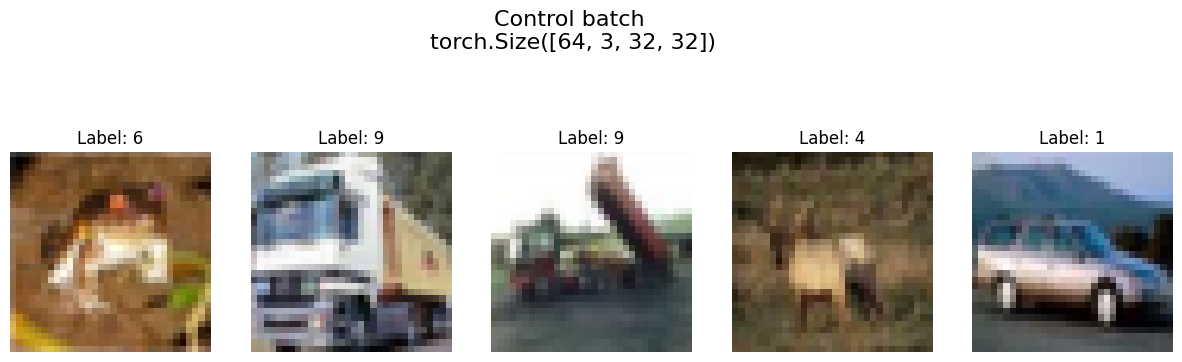

In [28]:
control_transform = transforms.Compose([
    transforms.ToTensor(),
    # Normalize the images
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])
cifar10_control = datasets.CIFAR10(root=data_dir, train=True, download=True, transform=control_transform)
control_loader = DataLoader(cifar10_control, batch_size=64, shuffle=False)
control_batch = next(iter(control_loader))
show_images(control_batch, "Control batch \n" + str(control_batch[0].shape))

Files already downloaded and verified


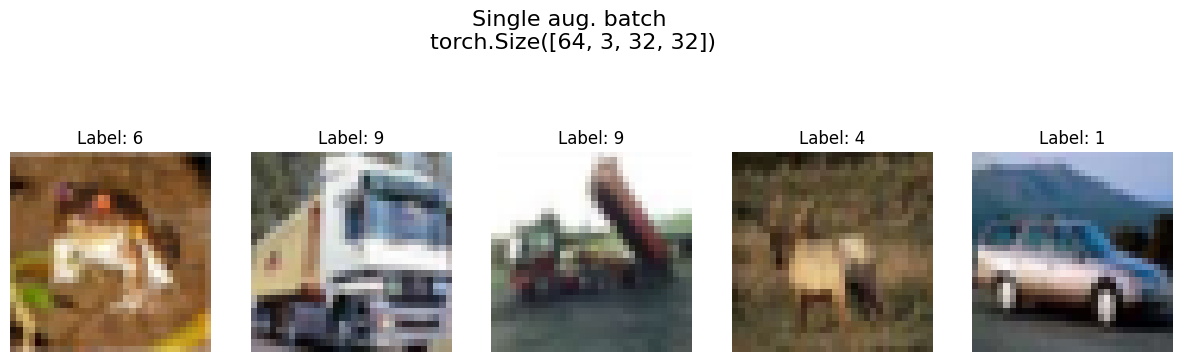

In [29]:
single_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),  
    transforms.ToTensor(),              
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

cifar10_single_aug = datasets.CIFAR10(root=data_dir, train=True, download=True, transform=single_augmentation)
single_aug_loader = DataLoader(cifar10_single_aug, batch_size=64, shuffle=False)
single_batch = next(iter(single_aug_loader))
show_images(single_batch, "Single aug. batch \n" + str(single_batch[0].shape))

Files already downloaded and verified


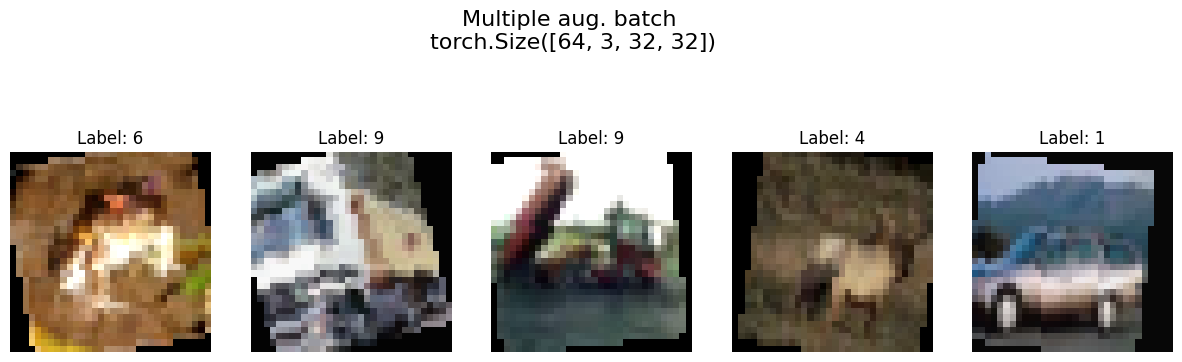

In [30]:
multiple_augmentations = transforms.Compose([
    transforms.RandomHorizontalFlip(),     
    transforms.RandomCrop(32, padding=4),  
    transforms.RandomRotation(15),         
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  
    transforms.ToTensor(),                 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

cifar10_multiple_aug = datasets.CIFAR10(root=data_dir, train=True, download=True, transform=multiple_augmentations)
multiple_aug_loader = DataLoader(cifar10_multiple_aug, batch_size=64, shuffle=False)
multiple_batch = next(iter(multiple_aug_loader))
show_images(multiple_batch, "Multiple aug. batch \n" + str(multiple_batch[0].shape))